**Desafio: Realizar a analise exploratória dos dados de Fakes News**


In [78]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [79]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
# importar a base de dados

import pandas as pd

df = pd.read_csv("../data/raw.csv")
df

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0
4006,https://www.activistpost.com/2017/09/ron-paul-...,"Ron Paul on Trump, Anarchism & the AltRight",NaN,0
4007,https://www.reuters.com/article/us-china-pharm...,China to accept overseas trial data in bid to ...,SHANGHAI (Reuters) - China said it plans to ac...,1


In [81]:
# Entender as informações apresentadas no df

print(df.info())

# Excluir linhas vazias
df = df.dropna()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4009 entries, 0 to 4008
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   URLs      4009 non-null   object
 1   Headline  4009 non-null   object
 2   Body      3988 non-null   object
 3   Label     4009 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 125.4+ KB
None


In [82]:
#Analise Exploratória Geral

print(df["Label"].value_counts())
print(df["Label"].value_counts(normalize=True).map("{:.1%}".format))



0    2120
1    1868
Name: Label, dtype: int64
0    53.2%
1    46.8%
Name: Label, dtype: object


Text(0.5, 1.0, 'Distribuicao REAL X FAKE')

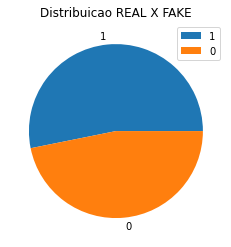

In [83]:
plt.pie(df["Label"].value_counts(), labels=df["Label"].unique())
plt.legend()
plt.title('Distribuicao REAL X FAKE')

Text(0.5, 0, '0 - Real / 1 - Fake')

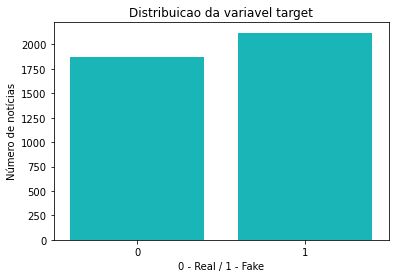

In [84]:
sns.barplot(x =df["Label"].unique(), y = df["Label"].value_counts(), color='DarkTurquoise')
plt.title('Distribuicao da variavel target')
plt.ylabel('Número de notícias')
plt.xlabel('0 - Real / 1 - Fake')

**ANALISE EXPLORATÓRIA DE NOTÍCIAS FAKES E NÃO FAKES**

O que analisar:

Quantidades de palavras em titulos de noticias fakes e não fakes (HeadLine x Label)

Palavras que mais aparecem em titulos de  noticias fakes news e não fakes news - Nuvens de palavras (HeadLine x Label)

Quantidades de palavras no corpo da noticias de fake nwes e não fakes (Body x Label)

Palavras que mais aparecem no corpo de noticias de fake news e não fakes - 
Nuvem de palavras (Baody x Label)

Sites que mais publicam fake News (URL X Label)


**ANALISE EXPLORATÓRIA SOMENTE DAS NOTÍCIAS FAKE NEWS**

In [85]:
# Separando os dados que são Fakes News

Fake_News = df[df['Label'] == 1]
Fake_News

,URLs,Headline,Body,Label
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1
...,...,...,...,...
3995,http://www.bbc.com/news/entertainment-arts-415...,Harvey Weinstein scandal: What next for Hollyw...,Image copyright Getty Images Image caption Har...,1
3999,https://www.reuters.com/article/us-baseball-ml...,Red Sox fire manager Farrell after five seasons,"FILE PHOTO: Oct 25, 2013; St. Louis, MO, USA; ...",1
4001,https://www.nytimes.com/2017/10/09/obituaries/...,"Hervé Leroux, Creator of the Hervé Léger Banda...","Mr. Leroux was born Hervé Peugnet on May 30, 1...",1
4002,http://www.cnn.com/videos/politics/2017/10/09/...,The price tag for Pence's trip to Indianapolis,Ethical questions loom after Vice President Mi...,1


In [86]:
def get_domain_url(url):
    var1 = url.split('/')[:3]
    return '/'.join(var1)

Fake_News['url_domain'] = Fake_News['URLs'].apply(get_domain_url)
Fake_News.head()

,URLs,Headline,Body,Label,url_domain
0,http://www.bbc.com/news/world-us-canada-414191...,Four ways Bob Corker skewered Donald Trump,Image copyright Getty Images\nOn Sunday mornin...,1,http://www.bbc.com
1,https://www.reuters.com/article/us-filmfestiva...,Linklater's war veteran comedy speaks to moder...,"LONDON (Reuters) - “Last Flag Flying”, a comed...",1,https://www.reuters.com
2,https://www.nytimes.com/2017/10/09/us/politics...,Trump’s Fight With Corker Jeopardizes His Legi...,The feud broke into public view last week when...,1,https://www.nytimes.com
3,https://www.reuters.com/article/us-mexico-oil-...,Egypt's Cheiron wins tie-up with Pemex for Mex...,MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...,1,https://www.reuters.com
4,http://www.cnn.com/videos/cnnmoney/2017/10/08/...,Jason Aldean opens 'SNL' with Vegas tribute,"Country singer Jason Aldean, who was performin...",1,http://www.cnn.com


In [87]:
# Entender as informações apresentadas na tabela

print(Fake_News.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1868 entries, 0 to 4007
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URLs        1868 non-null   object
 1   Headline    1868 non-null   object
 2   Body        1868 non-null   object
 3   Label       1868 non-null   int64 
 4   url_domain  1868 non-null   object
dtypes: int64(1), object(4)
memory usage: 87.6+ KB
None


**1 - Contar quantas palavras tem nos titulos de noticias Fakes**

In [88]:
Fake_News['count_words_title'] = Fake_News['Headline'].apply(lambda x: len(x.split(' ')))
#Fake_News['count_words_title'].value_counts()
Fake_News['count_words_title'].value_counts(normalize=True).map("{:.1%}".format)

9     18.7%
10    17.4%
8     14.4%
11    11.7%
7     11.1%
12     7.8%
6      7.1%
13     3.9%
5      3.6%
14     1.8%
15     0.8%
4      0.8%
3      0.7%
17     0.1%
16     0.1%
2      0.1%
Name: count_words_title, dtype: object

In [89]:
import plotly.express as px
title_fake = px.histogram(Fake_News, x = Fake_News['count_words_title'], title='Distribuicao do número de palabras no título de notícias falsas')
title_fake

**2 - Nuvem de palavras dos titulos de Fakes News**

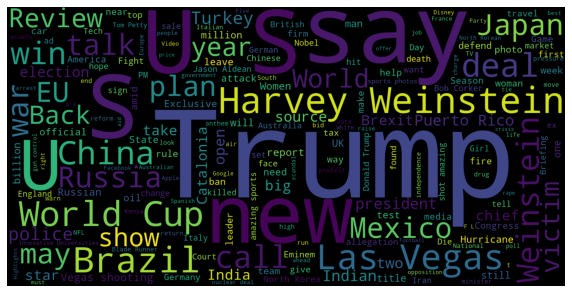

In [90]:
# concatenar as palavras
titulo = " ".join(t for t in Fake_News['Headline'])

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
    
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("titulos_Fake.png")


**3 - Contagem de palavras do Body das notícias Fake News**

In [91]:
Fake_News['count_words_body'] = Fake_News['Body'].apply(lambda x: len(x.split(' ')))
Fake_News['count_words_body'].value_counts()
Fake_News['count_words_body'].value_counts(normalize=True).map("{:.1%}".format)

16      3.3%
25      0.6%
28      0.5%
27      0.5%
310     0.5%
        ... 
813     0.1%
2860    0.1%
811     0.1%
809     0.1%
2050    0.1%
Name: count_words_body, Length: 948, dtype: object

In [92]:
body_fake = px.histogram(Fake_News, x = Fake_News['count_words_body'], title='Distribuicao do número de palabras no corpo do texto de notícias falsas')

**4 - Nuvem de palavras do corpo das notícia Fake News**

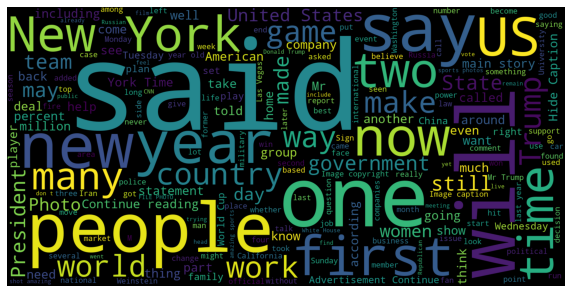

In [114]:
# concatenar as palavras
corpo = " ".join(t for t in Fake_News['Body'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o", "u", "s"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("corpo_Fake.png")

**5 - Sites que mais publicam Fake News**

In [94]:
Real_News = df[df['Label'] == 0]
Real_News

,URLs,Headline,Body,Label
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0
...,...,...,...,...
4000,https://www.activistpost.com/2017/09/false-arr...,35 False Matches and 1 Erroneous Arrest As Pol...,By Nicholas West\nAll things biometric are swe...,0
4003,http://beforeitsnews.com/u-s-politics/2017/10/...,CNN and Globalist Exposed - Steve Quayle and A...,"Vietnam Is in Great Danger, You Must Publish a...",0
4004,http://beforeitsnews.com/sports/2017/09/trends...,Trends to Watch,Trends to Watch\n% of readers think this story...,0
4005,http://beforeitsnews.com/u-s-politics/2017/10/...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,Trump Jr. Is Soon To Give A 30-Minute Speech F...,0


In [95]:
def get_domain_url(url):
    var1 = url.split('/')[:3]
    return '/'.join(var1)

Real_News['url_domain'] = Real_News['URLs'].apply(get_domain_url)
Real_News.head()

,URLs,Headline,Body,Label,url_domain
5,http://beforeitsnews.com/sports/2017/09/jetnat...,JetNation FanDuel League; Week 4,JetNation FanDuel League; Week 4\n% of readers...,0,http://beforeitsnews.com
10,https://www.activistpost.com/2017/09/u-s-presi...,U.S. President Donald Trump Quietly Signs Law ...,By Aaron Kesel\nAs former White House chief of...,0,https://www.activistpost.com
11,http://beforeitsnews.com/sports/2017/10/2017-f...,2017 Fantasy Football Team Defense Rankings - ...,2017 Fantasy Football Team Defense Rankings – ...,0,http://beforeitsnews.com
12,http://beforeitsnews.com/sports/2017/09/just-s...,Just Shut Up & Play Some Damn Baseball!!,Just Shut Up & Play Some Damn Baseball!!\n(Bef...,0,http://beforeitsnews.com
14,http://beforeitsnews.com/sports/2017/10/107-ch...,"10/7: Chuck Axed; HBD Brickyard, Adam, Moonlig...",A Potato Battery Can Light up a Room for Over ...,0,http://beforeitsnews.com


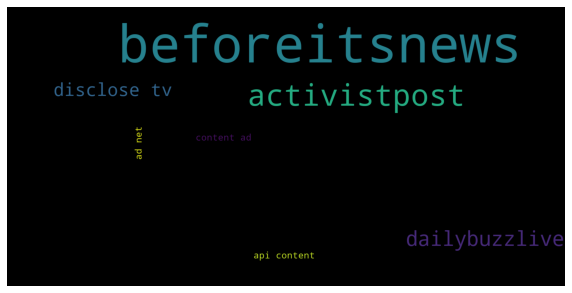

In [113]:
# concatenar as palavras
corpo = " ".join(t for t in Real_News['url_domain'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o", "https"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("sites_Fake_Real.png")

**ANALISE EXPLORATÓRIA SOMENTE DAS NOTÍCIAS REAL**

In [97]:
# Entender as informações apresentadas na tabela

print(Real_News.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2120 entries, 5 to 4008
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   URLs        2120 non-null   object
 1   Headline    2120 non-null   object
 2   Body        2120 non-null   object
 3   Label       2120 non-null   int64 
 4   url_domain  2120 non-null   object
dtypes: int64(1), object(4)
memory usage: 99.4+ KB
None


**1 - Contar quantas palavras tem nos titulos de noticias Reais**

In [98]:
Real_News['count_words_title_Real'] = Real_News['Headline'].apply(lambda x: len(x.split(' ')))
print(Real_News['count_words_title_Real'].value_counts())

11     258
10     238
9      224
8      200
12     199
7      141
6      124
5      123
13     120
14      89
15      87
17      56
16      51
4       49
18      36
20      35
3       25
2       24
19      15
22      10
1        9
32       2
73       1
26       1
21       1
110      1
46       1
Name: count_words_title_Real, dtype: int64


In [99]:
print(Real_News['count_words_title_Real'].value_counts(normalize=True).map("{:.1%}".format))

11     12.2%
10     11.2%
9      10.6%
8       9.4%
12      9.4%
7       6.7%
6       5.8%
5       5.8%
13      5.7%
14      4.2%
15      4.1%
17      2.6%
16      2.4%
4       2.3%
18      1.7%
20      1.7%
3       1.2%
2       1.1%
19      0.7%
22      0.5%
1       0.4%
32      0.1%
73      0.0%
26      0.0%
21      0.0%
110     0.0%
46      0.0%
Name: count_words_title_Real, dtype: object


In [100]:
title_true = px.histogram(Real_News, x=Real_News['count_words_title_Real'][Real_News['count_words_title_Real']<=17], title='Distribuicao do número de palabras no titulo de reportagens verídicas')
title_true

**2 - Nuvem de palavras dos titulos de Real News**

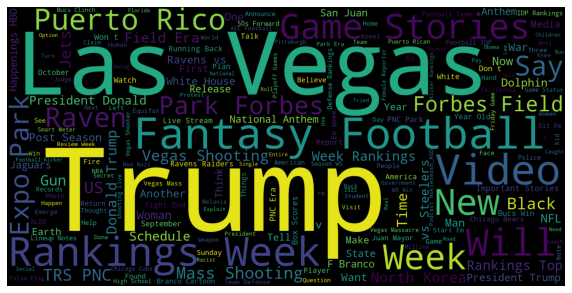

In [112]:
# concatenar as palavras
titulo = " ".join(t for t in Real_News['Headline'])

# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o", 's', 'u'])
    
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(titulo)
    
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
    
plt.imshow(wordcloud);
wordcloud.to_file("titulos_Real.png")

**3 - Contagem de palavras do Body das notícias Real News**

In [102]:
Real_News['count_words_body_Real'] = Real_News['Body'].apply(lambda x: len(x.split(' ')))
Real_News['count_words_body_Real'].value_counts()
Real_News['count_words_body_Real'].value_counts(normalize=True).map("{:.1%}".format)

26    10.7%
31     6.7%
24     5.6%
15     4.4%
21     1.4%
      ...  
57     0.0%
75     0.0%
83     0.0%
95     0.0%
14     0.0%
Name: count_words_body_Real, Length: 726, dtype: object

In [103]:
body_true = px.histogram(Real_News, x = Real_News['count_words_body_Real'], title='Distribuicao do número de palabras no corpo do texto de reportagens verídicas')
body_true

**4 - Nuvem de palavras do corpo das notícia Real News**

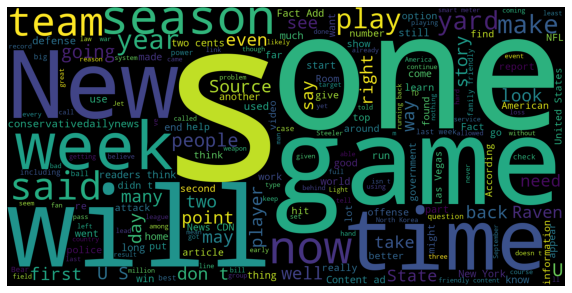

In [104]:
# concatenar as palavras
corpo = " ".join(t for t in Real_News['Body'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o"])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("corpo_Fake_Real.png")

**5 - Sites que mais publicam True News**

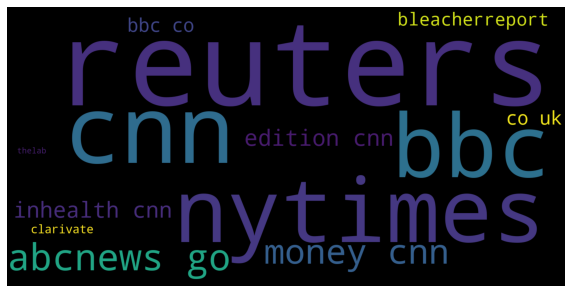

In [110]:
# concatenar as palavras
corpo = " ".join(t for t in Fake_News['url_domain'])
 
# lista de stopword
stopwords = set(STOPWORDS)
stopwords.update(["I", "yes", "no", "you", "the", "a", "o", 'https'])
 
# gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1600, height=800).generate(corpo)
 
# mostrar a imagem final
fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
 
plt.imshow(wordcloud);
wordcloud.to_file("sites_Fake.png")

In [106]:
title_fake

In [107]:
title_true

In [108]:
body_fake

In [109]:
body_true

**Conclusões**

Os titulos das notícias que são Fakes News possuem na sua maioria titulos com até 9 ou 10 palavras, enquanto as noticías que são reais os titulos apresentam em sua maioria 10 ou 11 palavras:

- É provavél que exista uma quantidade minima e maxíma de palavras que possam ser colocadas em notícias no geral?

Noticias que são Fakes em sua maioria são matérias que envolvem Governos mundiais e o ex presidente dos Estados Unidos Donald Trump, das palavras que mais são citadas em Fakes News temos: Trump; Hanvey; China; Las Vegas; Japam;
Já em noticias que são reais, envolvem assuntos mais gerais como esportes e temas de entretenimento, das palavras mais citadas temos: Trump; Las Vegas; Vídeo; Fantasy; Football; Ranking; Puerto Rico.

- É necessário que exploremos mais a fundo as noticias e em que contexto elas estão usando as palavras mais citadas.

O corpo do das noticías que são Fakes News geralmente possuem na sua maioria 16 palavras, enquanto as notícias reais possuem na maioria das notícias 26 palavras.

- É necessário uma analise mais aprofundada das notícias que estão contidas na base.

Em relação as palavras que são citadas no corpo das noticias que são Fake temos: One; Said; New Yourk; People; Say; Government, provavélmente essas palavras podem está ligadas a notícias que envolvem o governo ou orgãos governamentais. Em notícias reais as palavras que mais estão presentes no corpo da notícia temos: One; Game; Play; Week; Time; Going.

- É importante que vejamos as traduções destas palavras e em que contextos elas se encontram para termos uma base mais realista sobre o que o assunto está tratando.

Entre os sites que mais publicam Fake News temos Reuters, BBC, Nytimes, CNN, esses são sites de repercurção internacional. Entre os que mais publicam notícias reais temos Befoneitsnews e Activistpost.

- Precisamos entender as variaveis que estão em Label se consideramos 0 - como noticias verdadeiras e 1 - noticias falsas, pois os sites que mais publicam fake news tem uma repercurssão mundial o que é estranho serem os sites que mais publicam noticias fakes.